In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
print(y_train.shape)

(60000,)


In [5]:
print(X_test.shape)

(10000, 28, 28)


In [6]:
print(X_train[0].shape)

(28, 28)


In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

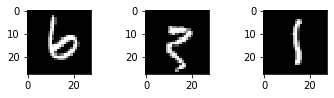

In [8]:
plt.subplot(331)
random = np.random.randint(0,len(X_train))
plt.imshow(X_train[random],cmap=plt.get_cmap('gray'))

plt.subplot(332)
random = np.random.randint(0,len(X_train))
plt.imshow(X_train[random],cmap=plt.get_cmap('gray'))

plt.subplot(333)
random = np.random.randint(0,len(X_train))
plt.imshow(X_train[random],cmap=plt.get_cmap('gray'))

In [9]:
img_rows = X_train[0].shape[0]
img_cols = X_train[0].shape[1]

In [10]:
X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows,img_cols,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255


In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
y_train[0]

5

In [13]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
from tensorflow.keras.optimizers import SGD

In [16]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),
                input_shape=input_shape,
                activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',
             optimizer=SGD(0.01),
             metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [18]:
batch_size = 32
epochs = 10

model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.5708 - accuracy: 0.8220 - val_loss: 0.1912 - val_accuracy: 0.9422
Epoch 2/10
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.2735 - accuracy: 0.9183 - val_loss: 0.1257 - val_accuracy: 0.9618
Epoch 3/10
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.1980 - accuracy: 0.9409 - val_loss: 0.0943 - val_accuracy: 0.9711
Epoch 4/10
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.1545 - accuracy: 0.9541 - val_loss: 0.0737 - val_accuracy: 0.9763
Epoch 5/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.1292 - accuracy: 0.9616 - val_loss: 0.0606 - val_accuracy: 0.9805
Epoch 6/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.1124 - accuracy: 0.9661 - va

In [21]:
score = model.evaluate(X_test,y_test,verbose=0)
print(score[1])

0.9856
